<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

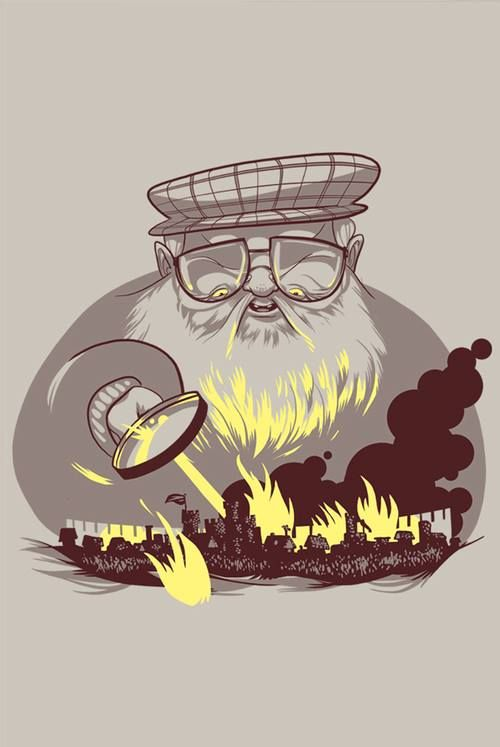

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [58]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

������� ������� ��������: 1251


"gdown" �� �������� ���������� ��� �������
��������, ����������� ���������� ��� �������� ������.


������� ������� ��������: 1251


"gdown" �� �������� ���������� ��� �������
��������, ����������� ���������� ��� �������� ������.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
data = pd.read_csv("C:/Users/Asus/Downloads/game_of_thrones_train.csv", index_col=[0])

In [3]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isnull().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [5]:
median_age = data['age'].median()
data['age'] = data['age'].fillna(median_age)

In [6]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,24.0,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,24.0,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,24.0,0,0.076923,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [7]:
data['isPopular'] = (data['popularity'] >= 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(bool)

In [8]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [9]:
def update_culture(value):
    for key, synonyms in cult.items():
        if value in synonyms:
            return key
    return value
data['culture'] = data['culture'].apply(lambda x: update_culture(x))

In [10]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,24.0,11,0.605351,0,1,True
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,True
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,24.0,0,0.267559,1,0,False
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0.183946,0,0,False
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0.043478,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,24.0,0,0.160535,1,0,False
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,24.0,0,0.040134,0,0,False
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,0,0,24.0,0,0.076923,0,0,False


In [11]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[['culture']])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["culture"]), index=data.index)

In [12]:
column_names = encoder.get_feature_names_out(["culture"])

# Заменяем столбец 'culture' на one-hot encoded данные
data.drop('culture', axis=1, inplace=True)
data[column_names] = one_hot_encoded

In [13]:
data

,name,title,male,dateOfBirth,mother,father,heir,house,spouse,book1,...,culture_Vale mountain clans,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westerman,culture_Westermen,culture_Westeros,culture_Wildling,culture_ironborn,culture_nan
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Walder Frey,Lord of the Crossing,1,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,House Swyft,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Aemma Arryn,Queen,0,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Sylva Santagar,Greenstone,0,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,House Seaworth,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [14]:
data = data.drop(columns=['name', 'title', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1)

In [15]:
columns_to_drop = [col for col in data.columns if 'culture_' in col]

# Удаляем столбцы
data.drop(columns=columns_to_drop, inplace=True)

In [16]:
data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,24.0,11,0.605351,0,1,True
2,1,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,True
3,1,0,0,0,1,0,0,1,24.0,0,0.267559,1,0,False
4,0,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,False
5,0,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,24.0,0,0.160535,1,0,False
1554,0,1,1,0,0,0,0,0,24.0,0,0.040134,0,0,False
1555,1,0,1,1,1,1,0,0,24.0,0,0.076923,0,0,False


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [17]:
data_set = pd.read_csv("C:/Users/Asus/Downloads/game_of_thrones_train.csv", index_col=[0])

In [18]:
data_set

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [19]:
if data_set.isAlive.dtype == 'object':
    print("Целевая переменная является категориальной.")
else:
    print("Целевая переменная не является категориальной.")

Целевая переменная не является категориальной.


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [20]:
data['boolDeadRelations'] = data['boolDeadRelations'].astype(int)

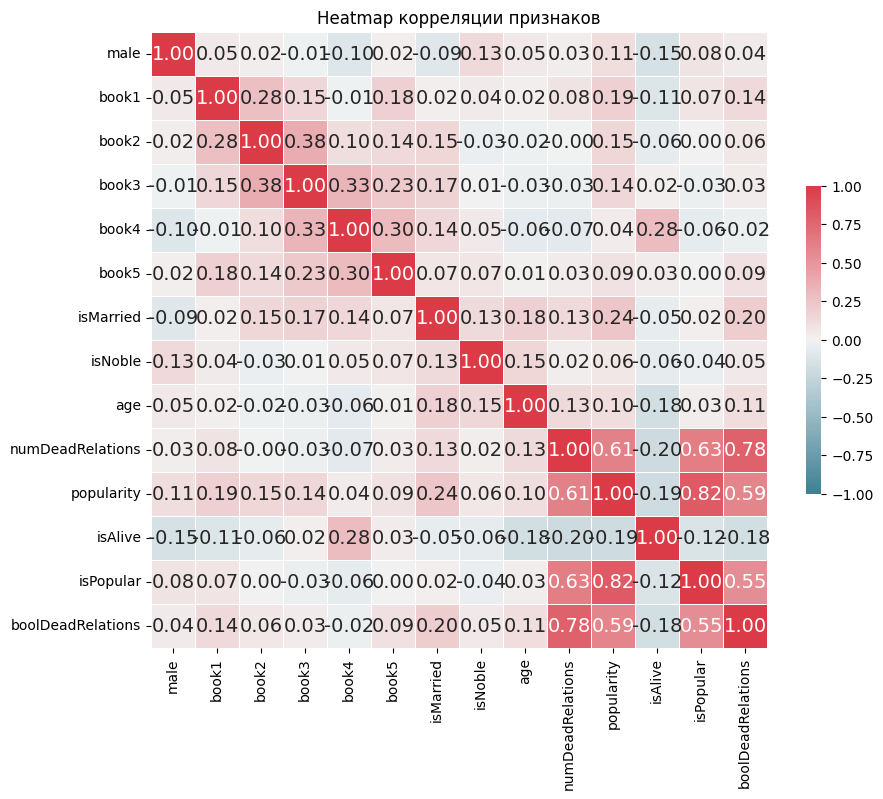

In [21]:
# Расчёт корреляционной матрицы
corr = data.corr()

# Построение heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Форматирование heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Построение heatmap
sns.heatmap(
    corr,
    vmin=-1, vmax=1,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 14}
)

# Настройка оси Y
plt.yticks(rotation=0)

# Название графика
plt.title('Heatmap корреляции признаков')

# Показать график
plt.show()

признаки достаточно слабо коррелируют между собой

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

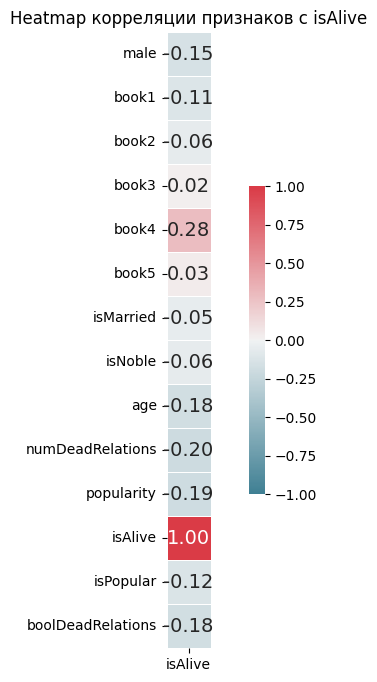

In [22]:
# Фильтрация матрицы для выделения корреляции с isAlive
corr = data.corr()
corr_with_isAlive = corr[['isAlive']]

# Построение heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Форматирование heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Построение heatmap
sns.heatmap(
    corr_with_isAlive,
    vmin=-1, vmax=1,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 14}
)

# Настройка оси Y
plt.yticks(rotation=0)

# Название графика
plt.title('Heatmap корреляции признаков с isAlive')

# Показать график
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [23]:
X = data.drop(columns="isAlive", axis=1)
y = data.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [26]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [27]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [28]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

c:\Users\Asus\Projects\DeepLearning_1sem\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

**Random Forest**

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Шаг 1. создание модели
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5 , 7, 10]} 
clf = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)
search = GridSearchCV(clf, param_grid=parameters, cv=5, verbose=1)

# Шаг 2. обучение модели
search.fit(X_train, y_train)
best_tree = search.best_estimator_
# Шаг 3. Предсказание на тестовых данных
predictions = best_tree.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


**KNN**

In [31]:
# Шаг 1. создание модели
knn_param = {
    'n_neighbors' : [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 20, 30],
    'p' : [1, 2]
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid=knn_param, cv = 5, scoring = 'accuracy', n_jobs=-1)
# Шаг 2. обучение модели
grid_knn.fit(X_train, y_train)
knn_tree = grid_knn.best_estimator_
# Шаг 3. Предсказание на тестовых данных
knn_predictions = knn_tree.predict(X_test)

**Decision Tree**

In [32]:
# Шаг 1. создание модели
tree_param = {'max_depth' : range(1, 11),
              'min_samples_split' : range(2, 11),
              'min_samples_leaf' : range(1, 11)
}
tree_clf = DecisionTreeClassifier(random_state=42)
search = GridSearchCV(tree_clf, param_grid=tree_param, cv=5)
# Шаг 2. обучение модели
search.fit(X_train, y_train)
tree_best = search.best_estimator_
# Шаг 3. Предсказание на тестовых данных
tree_predictions = tree_best.predict(X_test)

**SVC**

In [33]:
# Шаг 1. создание модели
model = SVC()
# Шаг 2. обучение модели
model.fit(X_train, y_train)
# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

**AdaBoostClassifier**

In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3, 4, 5] 
}
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(estimator=base_estimator)

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_ada = grid_search.best_estimator_
ada_pred = best_ada.predict(X_test)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


**GaussianNB**

In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

**GaussianProcessClassifier**

In [36]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

gpc.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [37]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [38]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


Аналогичным образом посчитайте метрику accuracy для остальных моделей

**Random Forests**

In [39]:
# Шаг 3. Предсказание на тестовых данных
accuracy = accuracy_score(y_test, predictions)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7977


**KNN**


In [40]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy : %.4f" % knn_accuracy)

Accuracy : 0.7899


**Decision Tree**

In [41]:
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Accuracy : %.4f" % tree_accuracy)

Accuracy : 0.7938


**SVC**

In [42]:
svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % svc_accuracy)

Accuracy : 0.7821


**AdaBoostClassifier**

In [43]:
ada_accuracy = accuracy_score(y_test, ada_pred)
print("Accuracy : %.4f" % ada_accuracy)

Accuracy : 0.7860


**GNB**

In [44]:
gnb.score(X_test, y_test)

0.7607003891050583

**GPC**

In [45]:
gpc.score(X_test, y_test)

0.7821011673151751

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [46]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

������� ������� ��������: 1251


"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [47]:
submission = pd.read_csv("C:/Users/Asus/Downloads/submission.csv", index_col='S.No')

In [48]:
data_test = pd.read_csv("C:/Users/Asus/Downloads/game_of_thrones_test.csv", index_col=[0])

In [49]:
data_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [50]:
data_test['isPopular'] = (data_test['popularity'] >= 0.5).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(bool)

In [51]:
median_age = data_test['age'].median()
data_test['age'] = data_test['age'].fillna(median_age)

In [52]:
data_test = data_test.drop(columns=['name', 'culture' ,'title', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1)

In [53]:
data_test

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,100.0,0,0.050167,0,False
1559,0,0,1,1,1,1,0,0,32.0,0,0.745819,1,False
1560,0,0,0,1,1,0,0,0,32.0,0,0.010033,0,False
1561,1,1,1,1,1,1,0,1,32.0,0,0.220736,0,False
1562,1,1,1,1,1,1,1,0,38.0,0,0.434783,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,0,0,32.0,0,0.351171,0,False
1943,1,0,1,0,1,1,0,0,32.0,0,0.096990,0,False
1944,1,1,1,1,1,1,0,0,32.0,0,0.030100,0,False


In [54]:
yyy = best_tree.predict(data_test)

In [55]:
yyy

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [56]:
submission['isAlive'] = yyy

Как сохранить измененный Pandas DataFrame в csv файл:

In [57]:
submission.to_csv("C:/Users/Asus/Downloads/new_submission.csv", index=False)